In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('Tele_Customers.csv')
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
x=df[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']]
y=df[['custcat']]
x.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [7]:
y.head()

,custcat
0,1
1,4
2,3
3,1
4,3


In [8]:
y=df.pop('custcat').values
x=df.values.astype('float')
x[:5,:]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [9]:
y[:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [10]:
x=StandardScaler().fit_transform(x)
x[:5,:]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [11]:
df.shape

(1000, 11)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train.shape

(800, 11)

In [14]:
y_train.shape

(800,)

In [15]:
k=6
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
yhat=neigh.predict(x_test)

In [16]:
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [17]:
accuracy=accuracy_score(y_test,yhat)
accuracy

0.33

In [18]:
accuracy_score(y_train,neigh.predict(x_train))

0.5075

In [19]:
accuracy_score(y_test, yhat)

0.33

In [20]:
Ks = 10
mean_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    print(mean_acc)

[0.29 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.29 0.34 0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.29  0.34  0.365 0.    0.    0.    0.    0.    0.    0.   ]
[0.29  0.34  0.365 0.325 0.    0.    0.    0.    0.    0.   ]
[0.29  0.34  0.365 0.325 0.33  0.    0.    0.    0.    0.   ]
[0.29  0.34  0.365 0.325 0.33  0.33  0.    0.    0.    0.   ]
[0.29  0.34  0.365 0.325 0.33  0.33  0.33  0.    0.    0.   ]
[0.29  0.34  0.365 0.325 0.33  0.33  0.33  0.335 0.    0.   ]
[0.29  0.34  0.365 0.325 0.33  0.33  0.33  0.335 0.33  0.   ]
[0.29  0.34  0.365 0.325 0.33  0.33  0.33  0.335 0.33  0.35 ]


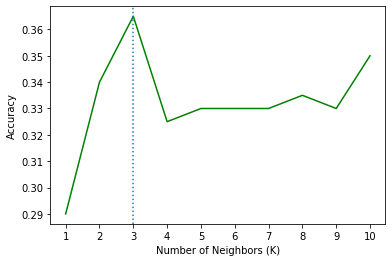

In [21]:
plt.plot(range(1, Ks+1), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.axvline(3, linestyle=':')
plt.xticks(range(1, Ks+1))
plt.show()